In [73]:
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# 加载数据集
data = sns.load_dataset('tips')

# 显示数据集的前几行
print(data.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [76]:
# 将'gender'列中的'Female'和'Male'转换为0和1
data['sex'] = (data['sex'] == 'Male').astype(int)

# 将'smoker'列中的'Yes'和'No'转换为0和1
data['smoker'] = (data['smoker'] == 'Yes').astype(int)

# 将'time'列中的'Dinner'和'Lunch'转换为0和1
data['time'] = (data['time'] == 'Dinner').astype(int)

# 将'day'列中的字符串表示的星期几转换为数字
day_mapping = {'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4}
data['day'] = data['day'].map(day_mapping)

# 显示数据集的前几行
print(data.head())

   total_bill   tip  sex  smoker day  time  size
0       16.99  1.01    0       0   4     1     2
1       10.34  1.66    1       0   4     1     3
2       21.01  3.50    1       0   4     1     3
3       23.68  3.31    1       0   4     1     2
4       24.59  3.61    0       0   4     1     4


In [77]:
# 检查缺失值
print(data.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [78]:
# 人为引入一些缺失值
data.loc[5:10, 'total_bill'] = np.nan
data.loc[15:20, 'size'] = np.nan
# 显示数据集的前几行，观察缺失值情况
print(data.head(10))

   total_bill   tip  sex  smoker day  time  size
0       16.99  1.01    0       0   4     1   2.0
1       10.34  1.66    1       0   4     1   3.0
2       21.01  3.50    1       0   4     1   3.0
3       23.68  3.31    1       0   4     1   2.0
4       24.59  3.61    0       0   4     1   4.0
5         NaN  4.71    1       0   4     1   4.0
6         NaN  2.00    1       0   4     1   2.0
7         NaN  3.12    1       0   4     1   4.0
8         NaN  1.96    1       0   4     1   2.0
9         NaN  3.23    1       0   4     1   2.0


In [82]:
# 检查缺失值
print(data.isnull().sum())
print(data.shape)

total_bill    6
tip           0
sex           0
smoker        0
day           0
time          0
size          6
dtype: int64
(244, 7)


In [83]:
# 删除缺失值所在的行
data_no_missing = data.dropna()

# 显示处理后的数据集
print(data_no_missing.head(10))
print(data_no_missing.shape)

    total_bill   tip  sex  smoker day  time  size
0        16.99  1.01    0       0   4     1   2.0
1        10.34  1.66    1       0   4     1   3.0
2        21.01  3.50    1       0   4     1   3.0
3        23.68  3.31    1       0   4     1   2.0
4        24.59  3.61    0       0   4     1   4.0
11       35.26  5.00    0       0   4     1   4.0
12       15.42  1.57    1       0   4     1   2.0
13       18.43  3.00    1       0   4     1   4.0
14       14.83  3.02    0       0   4     1   2.0
21       20.29  2.75    0       0   3     1   2.0
(232, 7)


In [93]:
# 在这个例子中，我们假设选择'total_bill'和'size'作为特征
selected_features = ['total_bill', 'size','smoker','day','time','size']
X = data_no_missing[selected_features]
Y = data_no_missing['tip']
print(X.shape)
print(Y.shape)

(232, 6)
(232,)


In [94]:
# 对特征进行缩放，以确保它们具有相似的尺度。
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
print(X_scaled.shape)

[[-0.32626149 -0.5892597  -0.81796378  1.15699505  0.64392092 -0.5892597 ]
 [-1.06505711  0.45431473 -0.81796378  1.15699505  0.64392092  0.45431473]
 [ 0.12034879  0.45431473 -0.81796378  1.15699505  0.64392092  0.45431473]
 ...
 [ 0.30476995 -0.5892597   1.22254802  0.28831268  0.64392092 -0.5892597 ]
 [-0.23405091 -0.5892597  -0.81796378  0.28831268  0.64392092 -0.5892597 ]
 [-0.12739771 -0.5892597  -0.81796378 -1.44905205  0.64392092 -0.5892597 ]]
(232, 6)


In [96]:
# 使用Z-score方法进行异常值检测和剔除
z_scores = np.abs(stats.zscore(X_scaled))
filtered_data = X_scaled[(z_scores < 3).all(axis=1)]

# 获取剔除异常值后的索引
filtered_indices = np.where((z_scores < 3).all(axis=1))[0]

# 根据索引获取对应的目标值
filtered_target = Y.iloc[filtered_indices]
print(filtered_data.shape)
print(filtered_target.shape)

(225, 6)
(225,)


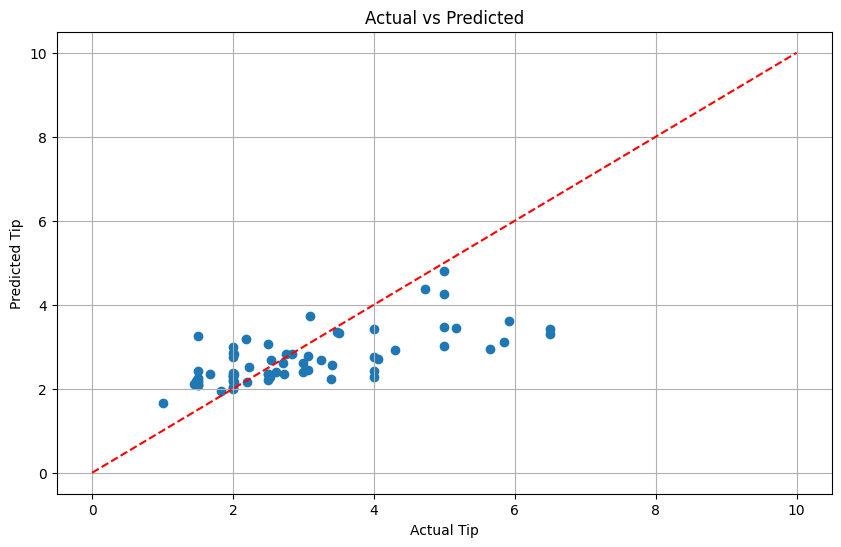

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(filtered_data, filtered_target, test_size=0.3, random_state=42)

# 训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 10], [0, 10], linestyle='--', color='red')  # 对角线表示理想情况
plt.title('Actual vs Predicted')
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.grid(True)
plt.show()

In [129]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=10000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            # Predictions
            y_predicted = np.dot(X, self.weights) + self.bias

            # Error
            error = y - y_predicted

            # Update weights and bias
            self.weights += self.learning_rate * (1 / n_samples) * np.dot(X.T, error)
            self.bias += self.learning_rate * (1 / n_samples) * np.sum(error)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mean_absolute_error(self, y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r_squared(self, y_true, y_pred):
        mean_y = np.mean(y_true)
        ss_total = np.sum((y_true - mean_y) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)


平均绝对误差: 0.76
均方误差: 1.15
R平方: 0.38


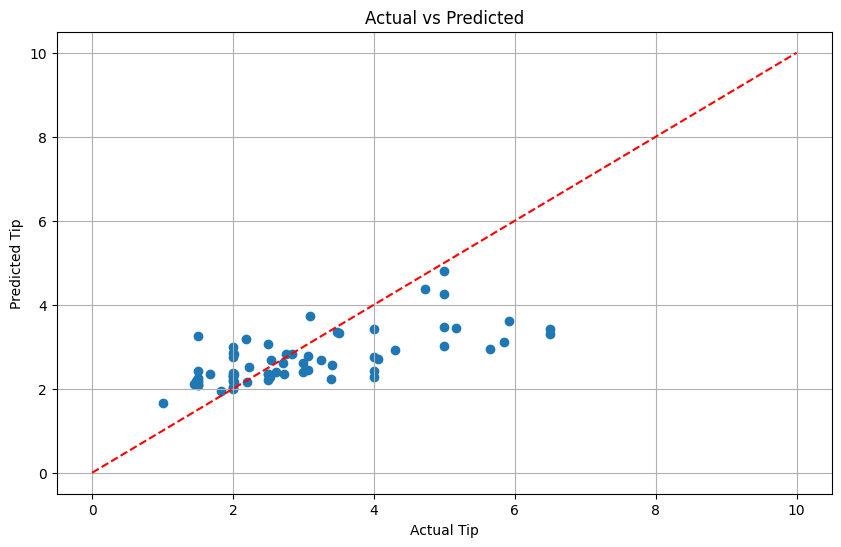

In [130]:
# Assuming X_train, y_train, X_test, y_test are available
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = model.mean_absolute_error(y_test, y_pred)
mse = model.mean_squared_error(y_test, y_pred)
r2 = model.r_squared(y_test, y_pred)

print(f"平均绝对误差: {mae:.2f}") #平均绝对误差是预测值与真实值之间绝对差值的平均值。
print(f"均方误差: {mse:.2f}") # 均方误差是预测值与真实值之间差值的平方的平均值。
print(f"R平方: {r2:.2f}") #实际值与预测值之间的方差占实际值方差的比例。R平方的取值范围在0到1之间，越接近1表示模型对数据的拟合程度越好。

# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 10], [0, 10], linestyle='--', color='red')  # 对角线表示理想情况
plt.title('Actual vs Predicted')
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.grid(True)
plt.show()